# Block 37: Workshop
## Image Classification of Fashion Items


## Scenario:
Fashion retailers globally are constantly seeking ways to improve their online shopping experience. One of the key challenges they face is accurately categorizing and tagging items based on their images. This is vital not only for internal product management but also for enhancing user experience. For instance, when a shopper searches for 'blue jeans', the retailer's website should be able to show all relevant items. To achieve this, the retailer requires a robust image classification system. 

### Objective:
Develop a machine learning model to accurately classify fashion items based on their images into predefined categories.

### Dataset:
You will use the Fashion MNIST dataset. This dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at a low resolution (28 by 28 pixels). Though the dataset is available on the GitHub repository, it's also widely available on Kaggle. You can download it directly from Kaggle's Fashion MNIST page.

### Categories:
T-shirt/top,
Trouser,
Pullover,
Dress,
Coat,
Sandal,
Shirt,
Sneaker,
Bag,
Ankle boot

### Directions to Solve:
- Data Exploration: Explore the Fashion MNIST dataset to understand its structure, data types, and distributions.

- Data Preprocessing: Normalize the images, handle missing values (if any), and split the data into training and test sets.

- Model Building: Use TensorFlow and Keras to design a deep learning model suitable for image classification. Consider using Convolutional Neural Networks (CNN) as they have proven to be effective for image data.

- Training: Train the model using the training dataset. Monitor the training loss and accuracy.

- Evaluation: Evaluate the model's performance on the test dataset. Calculate metrics such as accuracy, precision, recall, and F1 score.

- Optimization: If the model's performance is not satisfactory, consider techniques like data augmentation, changing the model architecture, or using different optimizers to enhance performance.

- Deployment: Once satisfied, consider deploying the model as a web service or integrating it into the retailer's existing system.


## Dataset:
The dataset can be downloaded from [Kaggle's Fashion MNIST page](https://www.kaggle.com/zalando-research/fashionmnist).


In [27]:
#Import Statements
import pandas as pd # DataFrame and Series 
import numpy as np # Arrays and numerical functions
import matplotlib.pyplot as plt # Basic data viz
import seaborn as sns # Data visualizations

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # Import specific preprocessing tools from scikit-learn.
from sklearn.model_selection import train_test_split  # Import a function for splitting data into training and testing sets.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Import TensorFlow and Keras
# Import TensorFlow, a popular deep learning framework.
import tensorflow as tf
from tensorflow import keras  # Import Keras, the high-level neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, layers


1. Load the dataset.

In [28]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

2. Display the first few images.

Train: x=(60000, 28, 28) , y= (60000,)
Test: x=(10000, 28, 28) , y= (10000,)


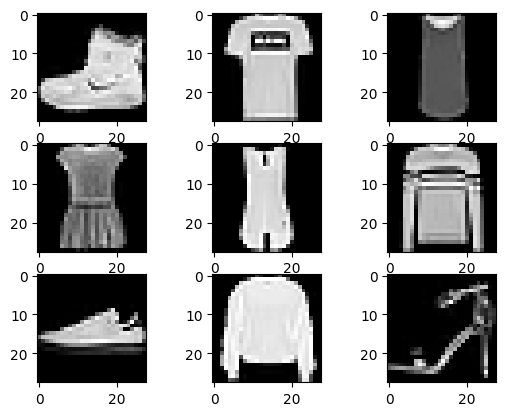

In [ ]:
###
### YOUR CODE HERE
###
print('Train: x=%s , y= %s' % (x_train.shape, y_train.shape))
print('Test: x=%s , y= %s' % (x_test.shape, y_test.shape))

for i in range(9):
    plt.subplot(330 + 1+i)
    plt.imshow(x_train[i], cmap= plt.get_cmap('gray'))
plt.show()

3. Normalize the images

In [31]:
# Normalizing the pixel values in the training set (x_train) by dividing them by 255.0
x_train, x_test = x_train/255.0 , x_test/255.0

4. Reshape the data to include the channel dimension.

In [32]:
# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

5. Build the model.

In [33]:
# Build a Sequential model using TensorFlow's Keras API
# Add a 2D convolutional layer with 32 filters, each of size (3, 3), using ReLU activation
# Input shape is set to (28, 28, 1) for grayscale images of size 28x28 pixels
# Add a 2D max pooling layer with pool size (2, 2) to reduce spatial dimensions
# Flatten the output to a 1D array to connect it to densely connected layers
# Add a densely connected layer with 128 neurons and ReLU activation
# Add the output layer with 10 neurons (for 10 classes) and no activation function specified

###
### YOUR CODE HERE
###

model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

c:\Users\arado\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

6. Compile the model.

In [35]:
###
### YOUR CODE HERE
###
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

7. Train the model.

In [37]:
###
### YOUR CODE HERE
###
Model_History = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8129 - loss: 0.5310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9030 - loss: 0.2687
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9203 - loss: 0.2144
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9330 - loss: 0.1825
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9456 - loss: 0.1477


8. Evaluate the model.

In [39]:
###
### YOUR CODE HERE
###
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - loss: 0.2686
Test Loss:  0.2643318474292755
Test Accuracy:  0.9081000089645386


In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = model.predict(x_test)
for test_case in range(0, len(predictions), 500):

    predicted_label = class_names[np.argmax(predictions[test_case])]
    print(f'Item ({test_case})   Actual label : {class_names[y_test[test_case]]}  --  Predicted label :  {predicted_label}    ---   {"Correct :)" if predicted_label == class_names[y_test[test_case]] else "Incorrect  ^U^"}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Item (0)   Actual label : Ankle boot  --  Predicted label :  Ankle boot    ---   Correct :)
Item (500)   Actual label : Pullover  --  Predicted label :  Pullover    ---   Correct :)
Item (1000)   Actual label : T-shirt/top  --  Predicted label :  Shirt    ---   Incorrect  ^U^
Item (1500)   Actual label : Dress  --  Predicted label :  Dress    ---   Correct :)
Item (2000)   Actual label : Bag  --  Predicted label :  Bag    ---   Correct :)
Item (2500)   Actual label : Shirt  --  Predicted label :  Shirt    ---   Correct :)
Item (3000)   Actual label : Trouser  --  Predicted label :  Trouser    ---   Correct :)
Item (3500)   Actual label : T-shirt/top  --  Predicted label :  T-shirt/top    ---   Correct :)
Item (4000)   Actual label : T-shirt/top  --  Predicted label :  T-shirt/top    ---   Correct :)
Item (4500)   Actual label : Coat  --  Predicted label :  Coat    ---   Correct :)
Item (5000)   Actual label : Pullover  --  Predicted label :  Pul

{'accuracy': [0.8619833588600159, 0.9052333235740662, 0.9200999736785889, 0.9330166578292847, 0.9420666694641113], 'loss': [0.3903390169143677, 0.25946444272994995, 0.21474063396453857, 0.18120123445987701, 0.15343491733074188]}


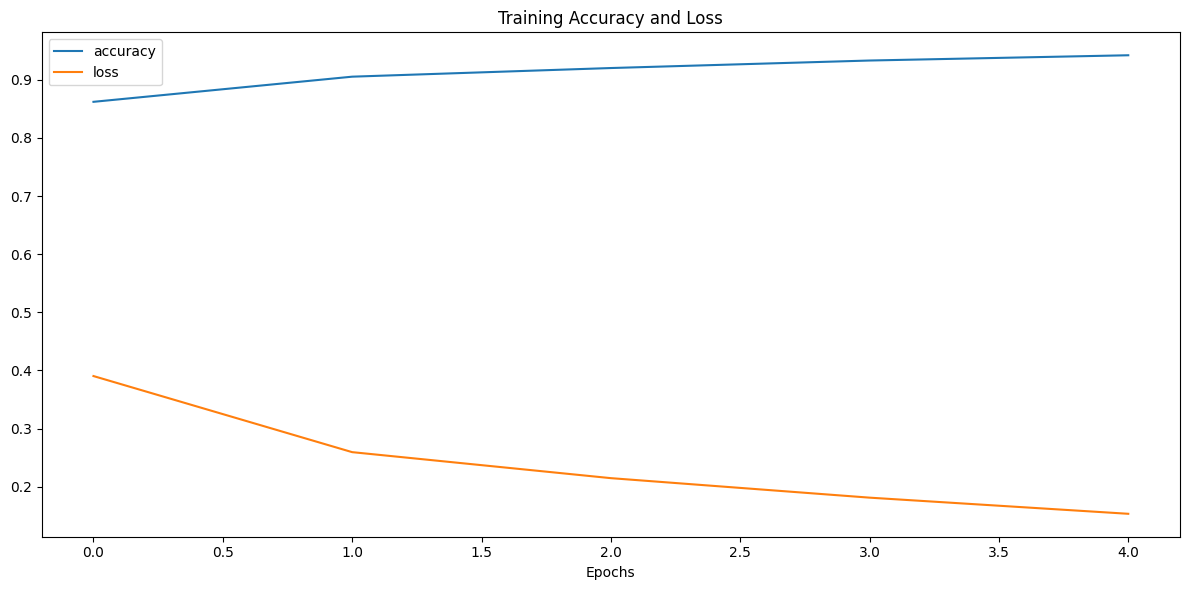

In [45]:
# Plotting Training & Validation Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 1, 1)
print(Model_History.history)
plt.plot(Model_History.history['accuracy'], label='accuracy')
plt.plot(Model_History.history['loss'], label='loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend()



plt.tight_layout()
plt.show()